In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from stats import mean, median, mode, multi_mode

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data =pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [9]:
# Combine the data into a single dataset
# Display the data table for preview

merged_data = pd.merge(city_data, ride_data, how='outer', on='city')
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [10]:
#Seperate the data between the different types
rural = merged_data.loc[(merged_data["type"] == "Rural")]
urban = merged_data.loc[(merged_data["type"] == "Urban")]
suburban = merged_data.loc[(merged_data["type"] == "Suburban")]


In [11]:
#The three type calculations
rural_avg_fare = rural.groupby(['city'])['fare'].mean()
rural_total_count = rural.groupby('city').count()['ride_id']
rural_total_drivers = rural.groupby(['city'])['driver_count'].sum()


urban_avg_fare = urban.groupby(['city'])['fare'].mean()
urban_total_count = urban.groupby('city').count()['ride_id']
urban_total_drivers = urban.groupby(['city'])['driver_count'].sum()


suburban_avg_fare = suburban.groupby(['city'])['fare'].mean()
suburban_total_count = suburban.groupby('city').count()['ride_id']
suburban_total_drivers = suburban.groupby(['city'])['driver_count'].sum()


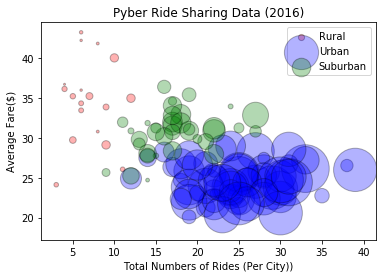

In [12]:
#Scatter-plots

plt.scatter(rural_total_count, rural_avg_fare,s=rural_total_drivers,
            marker ='o', facecolors ="red", edgecolors='black',alpha = 0.3, label="Rural")

plt.scatter(urban_total_count, urban_avg_fare,s=urban_total_drivers,
            marker ='o', facecolors ="blue", edgecolors='black',alpha = 0.3, label="Urban")

plt.scatter(suburban_total_count, suburban_avg_fare,s=suburban_total_drivers,
            marker ='o', facecolors ="green", edgecolors='black',alpha = 0.3, label="Suburban")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')

plt.savefig("../Images/PyberRide2016DataScatter.png")
plt.show()

In [13]:
#Total Fares by City Type
total_fares_type = merged_data.groupby("type")['fare'].sum()

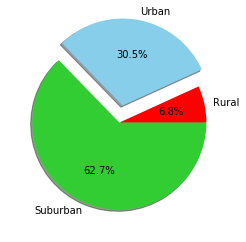

In [14]:
#Pie Chart for Total Fares by City
labels = ["Rural", "Urban","Suburban" ]
colors = ["red","skyblue","limegreen"]
explode = [0,0.2,0]

plt.pie(total_fares_type, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%")
plt.title = ("% of Total Fares by City Type")
plt.savefig("../Images/PyberRide2016DataFaresByCityPie.png")
plt.show()

In [15]:
#Total Rides by City Type
total_rides_type = merged_data.groupby("type")['ride_id'].count()


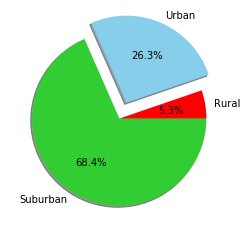

In [16]:
#Pie Chart for Total Rides by City Type
labels = ["Rural", "Urban","Suburban" ]
colors = ["red","skyblue","limegreen"]
explode = [0,0.2,0]

plt.pie(total_rides_type, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%")
plt.title = ("% of Total Fares by City Type")
plt.savefig("../Images/PyberRide2016RidesByCityPie.png")
plt.show()

In [17]:
#Total Drivers By City Type
total_drivers_type = city_data.groupby("type")['driver_count'].sum()

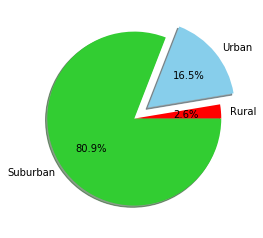

In [18]:
#Pie Chart for Total Drivers by City Type
labels = ["Rural", "Urban","Suburban" ]
colors = ["red","skyblue","limegreen"]
explode = [0,0.2,0]

plt.pie(total_drivers_type, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%")
plt.title = ("% of Total Drivers by City Type")
plt.savefig("../Images/PyberRide2016DriversByCityPie.png")
plt.show()